In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
import scipy.sparse

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ada.param to ada.param
Saving ada_test.data to ada_test.data
Saving ada_train.data to ada_train.data
Saving ada_train.labels to ada_train.labels
Saving ada_valid.data to ada_valid.data
Saving ada_valid.labels to ada_valid.labels


In [3]:
file = open("ada_train.data", "r")
file.read()

'0 1 1 32 0 0 0 1 0 0 0 0 0 0 812 0 0 0 0 0 0 0 0 0 300 0 1 0 0 0 0 0 0 0 0 0 0 0 0 404 1 0 0 0 0 0 0 0 \n0 0 1 133 0 0 1 0 0 0 0 0 0 0 437 0 0 0 1 0 0 0 0 0 189 0 1 0 1 0 0 0 0 0 0 0 0 0 0 242 0 0 0 0 0 0 0 0 \n0 0 0 109 0 0 0 1 0 0 0 0 0 0 812 1 0 0 1 0 0 0 0 0 455 1 1 0 0 0 0 0 0 0 0 0 0 0 0 404 1 0 0 0 0 0 0 0 \n0 0 0 113 0 0 0 1 0 0 0 0 0 0 812 1 0 0 1 0 0 0 0 0 400 0 0 0 0 0 1 52 0 0 0 0 0 0 0 404 0 0 0 1 0 1 0 0 \n0 0 0 120 0 0 0 1 0 0 0 0 0 0 562 0 0 0 1 1 0 0 0 0 233 0 1 0 0 0 0 0 0 0 0 0 0 0 0 303 0 1 0 0 0 0 0 0 \n0 0 0 121 0 0 0 1 0 0 0 0 0 0 624 0 0 0 1 0 0 0 0 0 444 0 0 0 0 1 0 0 0 0 0 0 0 0 0 404 1 0 0 0 0 1 0 0 \n0 0 0 76 0 0 1 1 0 0 0 0 0 0 874 1 0 0 1 0 0 0 0 0 377 0 1 0 0 0 0 0 0 0 0 0 0 0 0 404 0 0 0 0 0 1 0 0 \n0 0 1 16 0 0 0 1 0 0 0 0 0 0 562 1 0 0 1 0 0 0 0 0 244 0 1 0 0 0 0 0 0 0 0 0 0 0 0 404 1 0 0 0 0 0 0 0 \n0 0 0 30 0 0 1 1 0 0 0 0 0 0 437 0 0 0 1 0 0 0 0 0 200 0 1 0 0 0 0 0 0 0 0 0 0 0 0 202 0 1 0 0 0 0 0 0 \n0 0 0 110 0 0 0 1 0 433 0 0 0 0 812 1 0 0 1 0 0 

In [4]:
# Training
train_data   = pd.read_table("ada_train.data", delimiter= " ", header=None)
train_labels = pd.read_table("ada_train.labels" ,delimiter= " ", header=None)

train = pd.concat([train_data, train_labels], axis = 1, ignore_index = True)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,1,32,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,NaN,-1
1,0,0,1,133,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,NaN,-1
2,0,0,0,109,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,NaN,-1
3,0,0,0,113,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,NaN,1
4,0,0,0,120,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,NaN,-1


In [5]:
# Validation
valid_data   = pd.read_table("ada_valid.data", delimiter= " ", header=None)
valid_labels = pd.read_table("ada_valid.data", delimiter= " ", header=None)

valid = pd.concat([train_data, train_labels], axis = 1, ignore_index = True)
valid.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,1,32,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,NaN,-1
1,0,0,1,133,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,NaN,-1
2,0,0,0,109,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,NaN,-1
3,0,0,0,113,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,NaN,1
4,0,0,0,120,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,NaN,-1


In [6]:
# Testing
test_data    = pd.read_table("ada_test.data", delimiter= " ", header=None) 

# EDA

In [7]:
# How does our data look? - Training
print("Training dataset contains {} rows and {} columns.".format(train.shape[0], train.shape[1]))

Training dataset contains 4147 rows and 50 columns.


In [8]:
# How does our data look? - Validation
print("Validation dataset contains {} rows and {} columns.".format(valid.shape[0], valid.shape[1]))

Validation dataset contains 4147 rows and 50 columns.


In [9]:
# No data extracted from column names
columns = train.columns.tolist()
print(",".join([str(x) for x in columns]))

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49


In [10]:
# Checking for missing values
train.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48    4147
49       0
dtype: int64

In [11]:
valid.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48    4147
49       0
dtype: int64

In [12]:
# Column 48 missing all its values
train = train.drop([48], axis=1)
train.rename({49: 48}, axis=1, inplace=True)
valid = valid.drop([48], axis=1)
valid.rename({49: 48}, axis=1, inplace=True)


print("Training dataset contains {} rows and {} columns.".format(train.shape[0], train.shape[1]))

Training dataset contains 4147 rows and 49 columns.


In [13]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0,1,1,32,0,0,0,1,0,0,...,404,1,0,0,0,0,0,0,0,-1
1,0,0,1,133,0,0,1,0,0,0,...,242,0,0,0,0,0,0,0,0,-1
2,0,0,0,109,0,0,0,1,0,0,...,404,1,0,0,0,0,0,0,0,-1
3,0,0,0,113,0,0,0,1,0,0,...,404,0,0,0,1,0,1,0,0,1
4,0,0,0,120,0,0,0,1,0,0,...,303,0,1,0,0,0,0,0,0,-1


In [14]:
# Checking for duplicate rows -Train
train.duplicated().any()

True

In [15]:
# Checking for duplicate rows - Validation
valid.duplicated().any()

True

In [16]:
train = train.drop_duplicates(keep='first')
valid = valid.drop_duplicates(keep='first')

In [17]:
# Data types
train.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
41    int64
42    int64
43    int64
44    int64
45    int64
46    int64
47    int64
48    int64
dtype: object

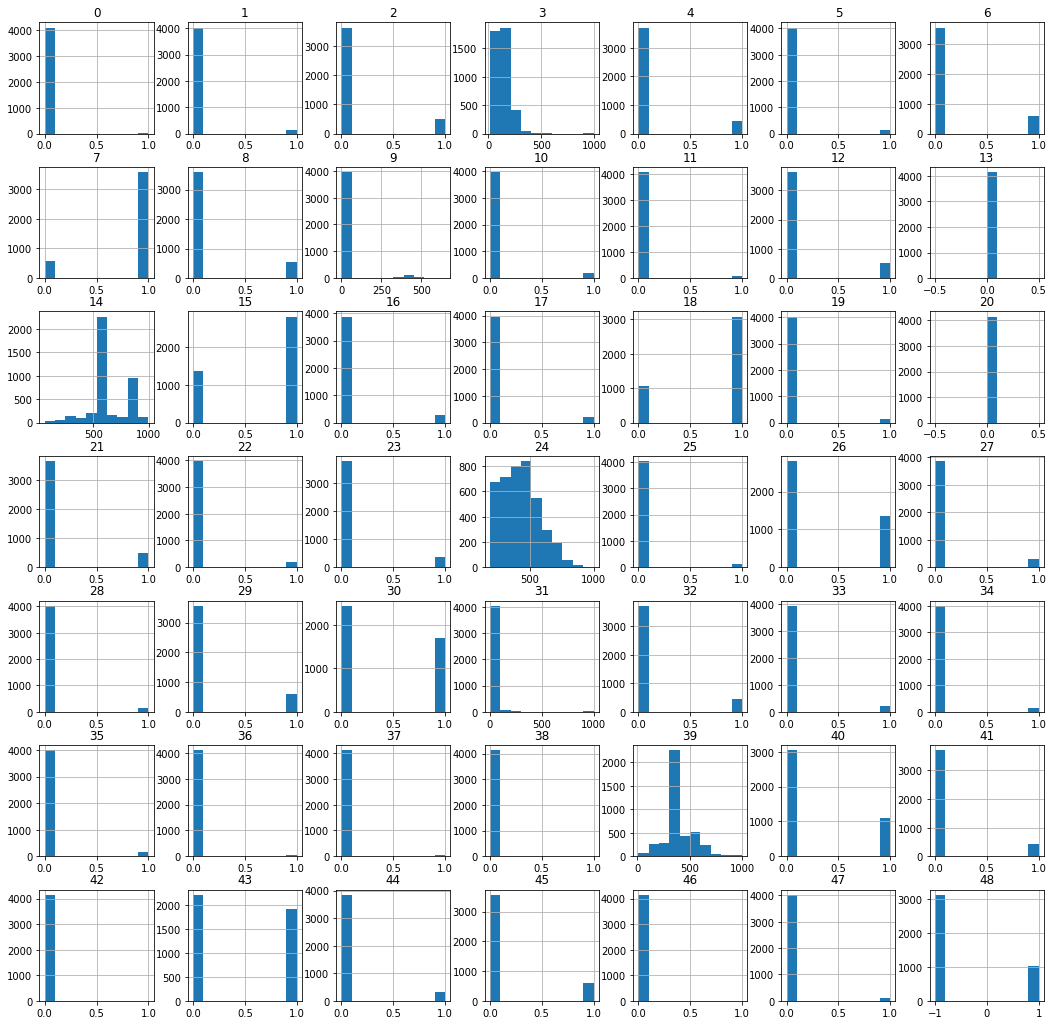

In [18]:
# Variable distributions
train.hist(figsize=(18,18))
plt.show()

In [19]:
# Stats
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,...,4146.000000,4146.000000,4146.00000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000
mean,0.008924,0.028944,0.120357,126.406416,0.104920,0.028461,0.140617,0.860106,0.134346,20.037868,...,411.806078,0.266522,0.10685,0.000482,0.464062,0.073082,0.140859,0.000241,0.029908,-0.503618
std,0.094057,0.167668,0.325418,69.762413,0.306488,0.166306,0.347668,0.346919,0.341065,91.943866,...,120.014406,0.442194,0.30896,0.021961,0.498767,0.260303,0.347918,0.015530,0.170355,0.864031
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,78.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,404.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,119.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,404.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.000000,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,454.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
max,1.000000,1.000000,1.000000,995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,648.000000,...,999.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


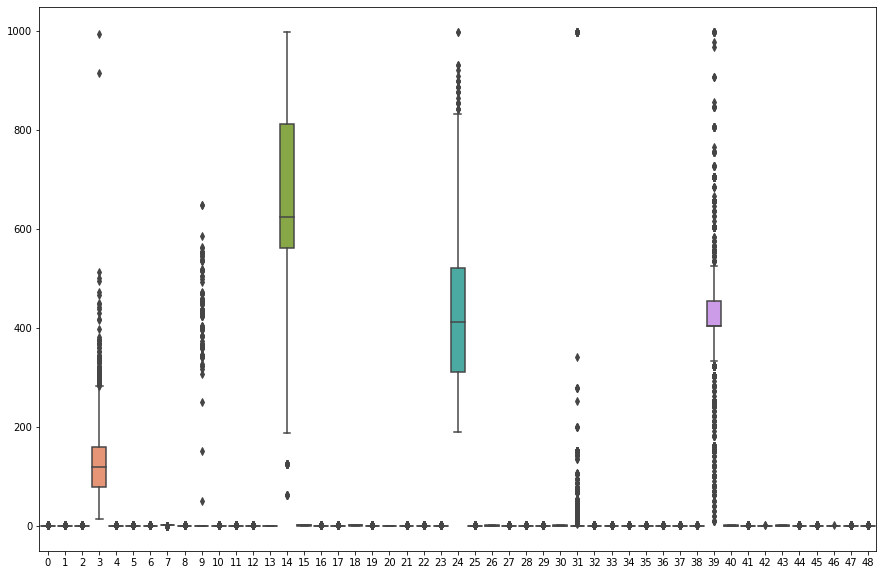

In [20]:
# Checking for outliers - Train
plt.figure(figsize = (15,10))
sns.boxplot(data = train)
plt.show()

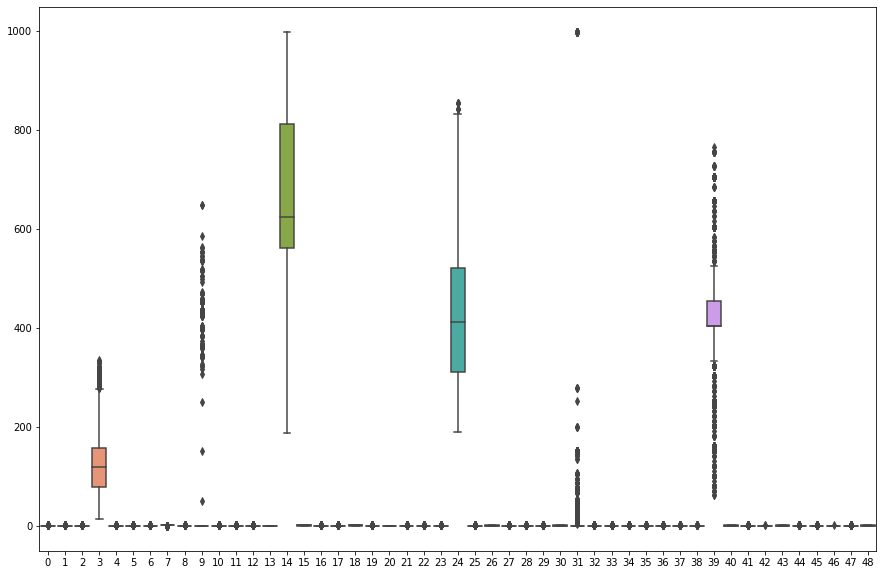

In [21]:
outlier_cols = [3,14,24,39]
for outlier in outlier_cols:
  train = train[np.abs(train[outlier]-train[outlier].mean()) <= (3*train[outlier].std())]

plt.figure(figsize = (15,10))
sns.boxplot(data = train)
plt.show()

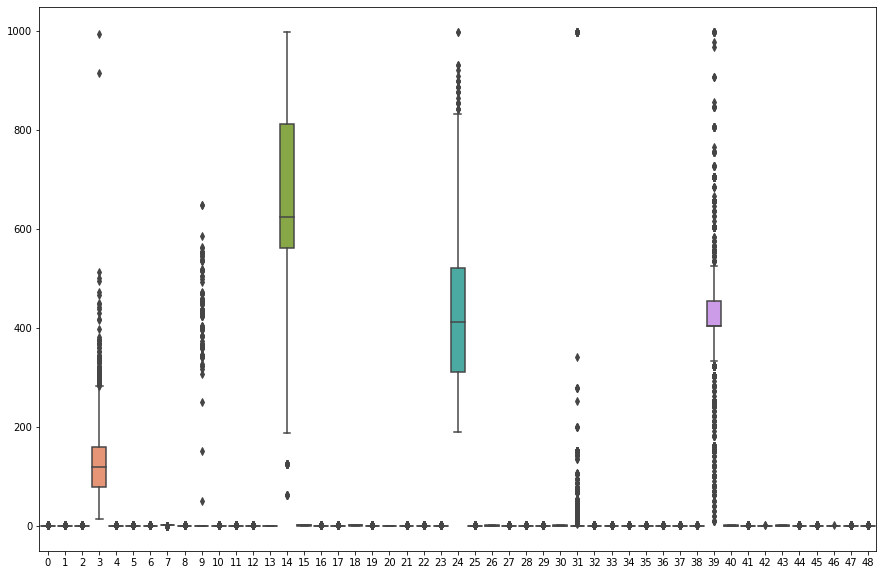

In [22]:
# Checking for outliers - Validation
plt.figure(figsize = (15,10))
sns.boxplot(data = valid)
plt.show()

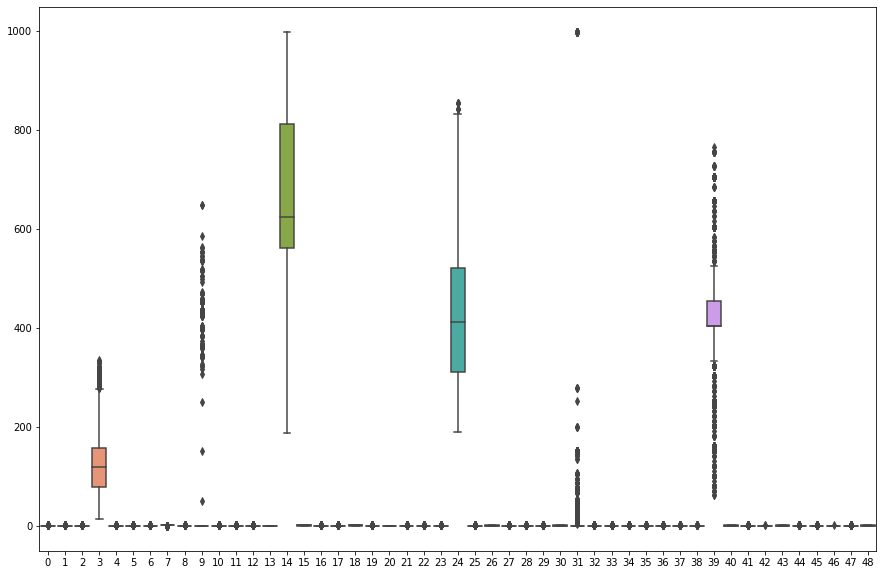

In [23]:
outlier_cols = [3,14,24,39]
for outlier in outlier_cols:
  valid = valid[np.abs(valid[outlier]-valid[outlier].mean()) <= (3*valid[outlier].std())]

plt.figure(figsize = (15,10))
sns.boxplot(data = valid)
plt.show()

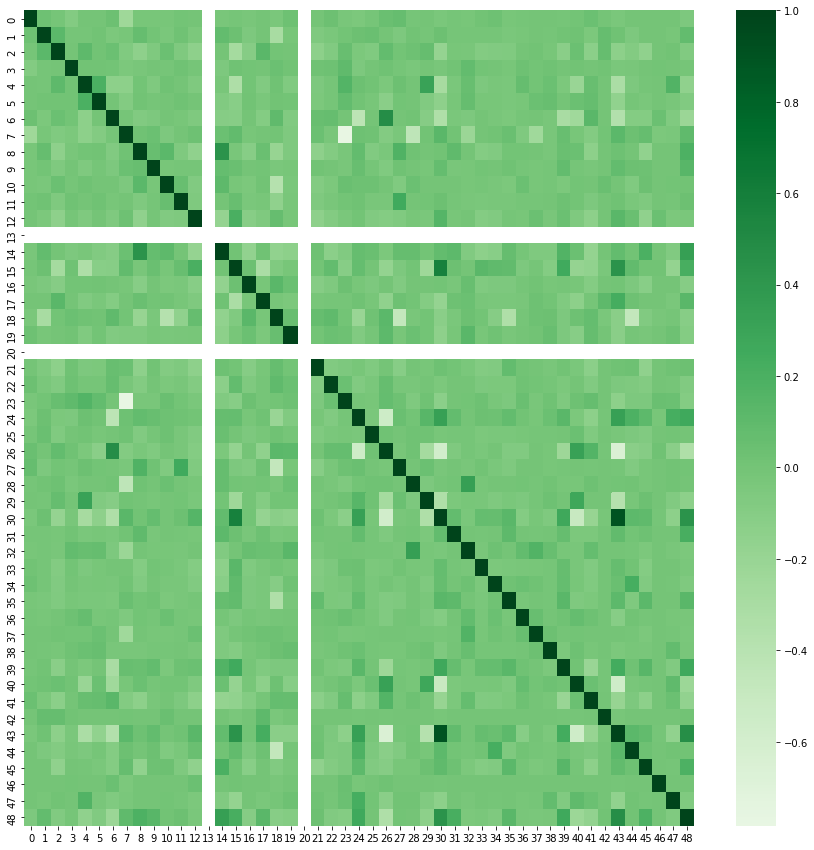

In [24]:
# Checking correlations
corrs = train.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corrs, cmap='Greens', center=0, annot=False)
plt.show()

In [25]:
# Columns 9,13, and 20 have no values
train = train.drop([13,20], axis=1)
new_names = [x for x in range(0,47)]
train.columns = new_names

In [26]:
valid = valid.drop([13,20], axis=1)
valid.columns = new_names

In [27]:
train = train.reset_index(drop=True)
train = train.iloc[: , 1:]

valid = valid.reset_index(drop=True)
valid = valid.iloc[: , 1:]

In [28]:
train.head(1)

,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
0,1,1,32,0,0,0,1,0,0,0,...,404,1,0,0,0,0,0,0,0,-1


# Model

In [29]:
X = train.drop(46, axis = 1)
y = train[46]

### Models 

In [30]:
def knn(X_train, X_test, y_train, y_test, printing):
  error = []
  fold = 1

  for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))
            
 # if printing == 1:
 #   print("Minimum error:-",min(error),"at K =",error.index(min(error)))

  return y_pred, knn

In [31]:
def lda(X_train, X_test, y_train, y_test, printing):
  lda = LDA(n_components=1)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
          
  classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  return y_pred, lda

In [32]:
def reg(X_train, X_test, y_train, y_test, printing):
  logreg = LogisticRegression(solver='lbfgs', max_iter=100)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)

  return y_pred, logreg

In [33]:
def gini(X_train, X_test, y_train, y_test, hyperparameters, printing):
  acc_score = []

  clf = DecisionTreeClassifier(criterion = "gini",random_state = hyperparameters[2], max_depth =hyperparameters[1] , min_samples_leaf = hyperparameters[0])
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_pred , y_test)
  acc_score.append(acc)

  return  y_pred, clf

In [34]:
def entropy(X_train, X_test, y_train, y_test, hyperparameters,printing):
  acc_score = []

  clf = DecisionTreeClassifier(criterion = "entropy",  max_depth =hyperparameters[0] , min_samples_leaf = hyperparameters[1], random_state = hyperparameters[2])
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_pred, y_test)
  acc_score.append(acc)

  return y_pred,clf

In [35]:
def naive_bayes(X_train, X_test, y_train, y_test, printing):
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  y_pred  =  classifier.predict(X_test)

  return y_pred, classifier

In [36]:
def plot_cm(cm, model):
  ax = sns.heatmap(cm/np.sum(cm), annot=True,  cmap="Greens")
  ax.set_title('Confusion Matrix Male Label\n\n' + model);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [37]:
def model(X, y, n_splits, model, hyperparameters, printing):
  k_folds = KFold(n_splits = n_splits)
  acc_score = []
  cm = 0

  for train_index , test_index in k_folds.split(X):
      X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train , y_test = y[train_index] , y[test_index]

      if model == "knn":
        y_pred, mod = knn(X_train, X_test, y_train, y_test, printing)
          
      elif model == 'lda':
       try:
        y_pred, mod = lda(X_train, X_test, y_train, y_test, printing)
       except:
        print("Loading...")

      elif model == 'reg':
       y_pred, mod =  reg(X_train, X_test, y_train, y_test, printing)

      elif model == 'gini':
       y_pred, mod =  gini(X_train, X_test, y_train, y_test, hyperparameters, printing)

      elif model == 'entropy':
        y_pred, mod = entropy(X_train, X_test, y_train, y_test, hyperparameters, printing)

      elif model == 'bayes':
        y_pred, mod =  naive_bayes(X_train, X_test, y_train, y_test, printing)
        
      acc = accuracy_score(y_pred , y_test)
      acc_score.append(acc)
     
  avg_acc = [round(item, 2) for item in acc_score]   
  avg_acc_score = sum(acc_score)/n_splits
  cm = confusion_matrix(y_test, y_pred)

  if printing == 1:
    report = metrics.classification_report(y_test, y_pred )
    print("Model:", model)
    print('Avg accuracy : {}'.format(round(avg_acc_score,3)))
    print(metrics.classification_report(y_test, y_pred ))
    return cm, y_pred, mod

  else:
    print("Model:", model)
    print('Avg accuracy : {}'.format(round(avg_acc_score,3)))
    return cm, y_pred, mod

In [38]:
from warnings import filterwarnings
filterwarnings("ignore")

### Applying the classifiers

In [82]:
classifiers = ["knn","lda", "reg", "gini", "entropy", "bayes"]
confusion_matrices_train = []

for c in classifiers:
  cm, y_pred, mod = model(X, y, 10, c, [3,50,5], 1)
  confusion_matrices_train.append(cm)

Model: knn
Avg accuracy : 0.793
              precision    recall  f1-score   support

          -1       0.83      0.93      0.88       298
           1       0.71      0.46      0.56       104

    accuracy                           0.81       402
   macro avg       0.77      0.70      0.72       402
weighted avg       0.80      0.81      0.80       402

Model: lda
Avg accuracy : 0.844
              precision    recall  f1-score   support

          -1       0.88      0.90      0.89       298
           1       0.69      0.63      0.66       104

    accuracy                           0.83       402
   macro avg       0.79      0.77      0.78       402
weighted avg       0.83      0.83      0.83       402

Model: reg
Avg accuracy : 0.835
              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       298
           1       0.70      0.60      0.64       104

    accuracy                           0.83       402
   macro avg       0.78      0.7

## Validation

In [40]:
X = valid.drop(46, axis = 1)
y = valid[46]

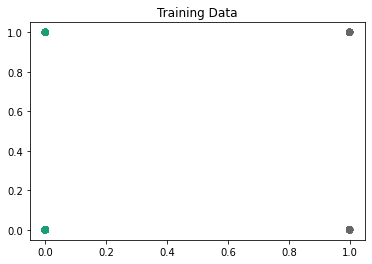

In [67]:
plt.scatter(X.to_numpy()[:,0],X.to_numpy()[:,1],  c= X[1], cmap =  'Dark2')
plt.title("Training Data")
plt.show()

In [41]:
predictions = []
models = []
confusion_matrices_valid = []

for c in classifiers:
  cm, y_pred, mod = model(X, y, 5, c, [5,50,5], 0)
  predictions.append(y_pred)
  models.append(mod)
  confusion_matrices_valid.append(cm)

Model: knn
Avg accuracy : 0.797
Model: lda
Avg accuracy : 0.843
Model: reg
Avg accuracy : 0.833
Model: gini
Avg accuracy : 0.824
Model: entropy
Avg accuracy : 0.83
Model: bayes
Avg accuracy : 0.776


## Evaluation

### BER

In [55]:
#BER = 0.5*(b/(a+b) + c/(c+d))
BER = []
for i in range(0, len(confusion_matrices_valid)):
  ber = 0.5* (confusion_matrices_valid[i][0][1]/(confusion_matrices_valid[i][0][0] + confusion_matrices_valid[i][0][1]) +
              confusion_matrices_valid[i][1][0]/ (confusion_matrices_valid[i][1][0] + confusion_matrices_valid[i][1][1]))
  BER.append(round(ber, 4))
  print("Classifier: ", classifiers[i])
  print(round(ber,4))

Classifier:  knn
0.3076
Classifier:  lda
0.2187
Classifier:  reg
0.2367
Classifier:  gini
0.2413
Classifier:  entropy
0.2708
Classifier:  bayes
0.1909


### BER guess error

In [43]:
# Training:
BER_train = []
for i in range(0, len(confusion_matrices_train)):
  ber = 0.5* (confusion_matrices_train[i][0][1]/(confusion_matrices_train[i][0][0] + confusion_matrices_train[i][0][1]) +
              confusion_matrices_train[i][1][0]/ (confusion_matrices_train[i][1][0] + confusion_matrices_train[i][1][1]))
  BER_train.append(round(ber, 4))
print(BER)
print(BER_train)

[0.3076, 0.2187, 0.2367, 0.2413, 0.2708, 0.1909]
[0.3028, 0.2314, 0.2472, 0.2573, 0.286, 0.177]


In [44]:
delta = []
#deltaBER = abs(predictedBER - testBER)
for i in range(0, len(classifiers)):
  diff = abs(BER[i] - BER_train[i])
  delta.append(round(diff, 4))
  print("Classifier: ", classifiers[i])
  print(round(diff, 4))

Classifier:  knn
0.0048
Classifier:  lda
0.0127
Classifier:  reg
0.0105
Classifier:  gini
0.016
Classifier:  entropy
0.0152
Classifier:  bayes
0.0139


### AUC

In [63]:
from sklearn import model_selection
AUC = []

for i in range(0, len(models)):
  scoring = 'roc_auc'
  results = model_selection.cross_val_score(models[i], X, y, cv= 10, scoring=scoring)
  AUC.append(results.mean())
  print("Classifier: ", classifiers[i])
  print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

Classifier:  knn
AUC: 0.801 (0.020)
Classifier:  lda
AUC: 0.900 (0.012)
Classifier:  reg
AUC: 0.884 (0.018)
Classifier:  gini
AUC: 0.835 (0.023)
Classifier:  entropy
AUC: 0.883 (0.013)
Classifier:  bayes
AUC: 0.877 (0.011)


### Test Score

In [46]:
total_errors = [pred for pred,actual in zip(y_pred, y) if pred!= actual]
len(total_errors)

377

In [47]:
classminus1_errors = [pred for pred,actual in zip(y_pred, y) if actual == - 1 and pred!= actual]
p1 = len(classminus1_errors)/ len(total_errors)
p2 = (len(total_errors) - p1) /len(total_errors)

In [48]:
(p1* (1-p1)/ valid[valid[46] == -1].shape[0])

7.196881510031756e-05

In [49]:
(p2* (1-p2) /valid[valid[46] == 1].shape[0])

1.7941817421064455e-06

In [50]:
# E = testBER + deltaBER * (1- exp(-deltaBER/sigma))
import math

sigma = (1/2) * math.sqrt( (p1* (1-p1)/ valid[valid[46] == -1].shape[0]) + (p2* (1-p2) /valid[valid[46] == 1].shape[0]))
sigma

0.004294269345372505

In [57]:
for i in range(0, len(BER)):
  E = BER[i] + delta[i] * (1- math.exp(delta[i] *-1/sigma))
  print("Classifier: ", classifiers[i])
  print(round(E,2))

Classifier:  knn
0.31
Classifier:  lda
0.23
Classifier:  reg
0.25
Classifier:  gini
0.26
Classifier:  entropy
0.29
Classifier:  bayes
0.2


Text(0.5, 1.0, 'BER')

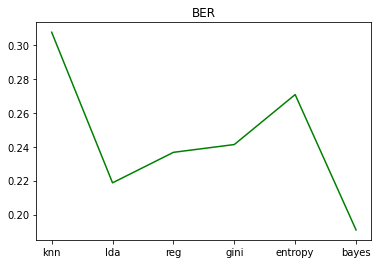

In [64]:
p = plt.plot(classifiers,BER, color="g")
plt.title("BER")

Text(0.5, 1.0, 'AUC')

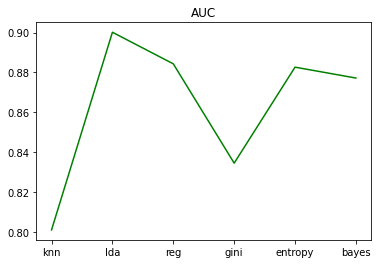

In [66]:
p = plt.plot(classifiers,AUC, color="g")
plt.title("AUC")

In [73]:
# Gaussian
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit

test_sizes = np.arange(0.1, 0.6, 0.05).tolist()
test_sizes = [round(item, 2) for item in test_sizes]
train_sizes = [1 - x for x in test_sizes]
training_scores = []
testing_scores = []
acc_score = []


for i in range (0, len(test_sizes)):
  ss = ShuffleSplit(n_splits=5, train_size= train_sizes[i], test_size= test_sizes[i])
  
  
  for train_index, test_index in ss.split(X):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    y_pred  =  classifier.predict(X_test)
    acc = accuracy_score(y_pred , y_test)
    acc_score.append(acc)
      
  avg_acc_score = sum(acc_score)/5
  cm = confusion_matrix(y_test, y_pred)
  report = metrics.classification_report(y_test, y_pred )
  training_scores.append(classifier.score(X_train, y_train))
  testing_scores.append(classifier.score(X_test, y_test))

[0.77, 0.76, 0.76, 0.79, 0.79, 0.77, 0.77, 0.77, 0.77, 0.78]

In [74]:
training_scores = [round(item, 2) for item in training_scores]
training_scores 

[0.77, 0.77, 0.77, 0.76, 0.77, 0.77, 0.78, 0.77, 0.77, 0.77]

(0.65, 0.8190000000000001)

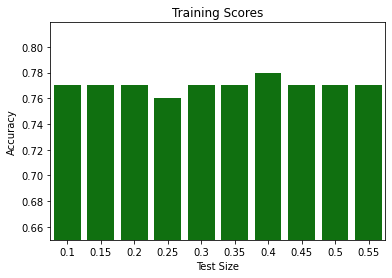

In [75]:
p = sns.barplot(x= test_sizes, y= training_scores, color="g")
plt.ylabel("Accuracy")
plt.xlabel("Test Size")
plt.title("Training Scores")
plt.ylim(0.65)

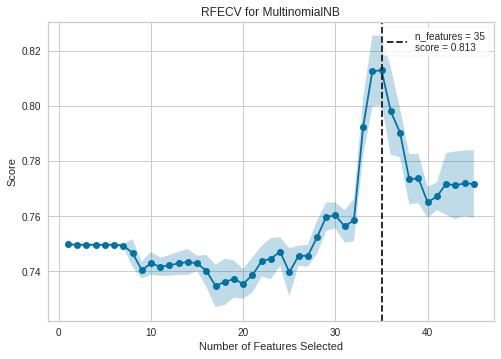

In [76]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

classifier = MultinomialNB()
cv = StratifiedKFold(5)
visualizer = RFECV(classifier, cv=cv, scoring='accuracy')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

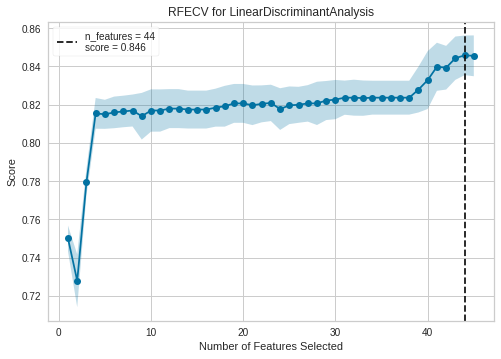

In [78]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

classifier = LDA(n_components=1)
cv = StratifiedKFold(5)
visualizer = RFECV(classifier, cv=cv, scoring='accuracy')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [80]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [81]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}